In [1]:
# poröse layer und air-layer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import csv
import numpy as np
from numpy import cos, sin, pi, sqrt

path = 'data/data.csv'

# neue dict date zu speichern
my_dict = {}
with open(path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    i = 0
    for row in reader:
        my_dict[row[0]] = [row[1],row[3]]
d = my_dict['Aluminium'][0]


In [3]:
# JAC-Modell
# Porosität des porösen Materials (Φ)
# Dichte der Flüssigkeit (normalerweise Luft) (ρ)
# Viskosität des Fluids (η)
# Strömungswiderstand des porösen Materials (σ)
# Frequenz der Schallwelle (f)
# Thermische Parameter eines porösen Materials (Pr, Le)
# Wärmekapazität des porösen Materials (Cp)
# Porengröße des porösen Materials (d)


def JAC(f, dichte, phi, alpha_unend, sigma, gamma, P0, viskosität_L, thermisch_L, Pr, viskosität):

    K0 = gamma * P0
    omega = 2*pi*f
    G1 = sigma * phi / (alpha_unend * dichte * omega)
    
    G2 = 4*((alpha_unend)**2) * dichte * viskosität * omega / ((sigma*phi*viskosität_L)**2)
    
    G1_dot = 8*viskosität / (dichte * Pr * ((thermisch_L)**2) * omega)
    
    G2_dot = dichte * Pr * ((thermisch_L)**2) * omega / (16*viskosität)
    
    dichte_p = dichte * alpha_unend * (1- 1j*G1*sqrt(1+1j*G2)) / phi
    
    K_p = K0*phi**(-1) / (gamma - (gamma-1)*((1- 1j*G1_dot*sqrt(1+ 1j*G2_dot))**-1))
    
    kp = omega * sqrt(dichte_p/K_p)
    Zp = sqrt(dichte_p*K_p)

    return Zp, kp

poroese Schicht Dicke(mm):30
Luft Schicht Dicke(mm):30
max. frequenz:5000


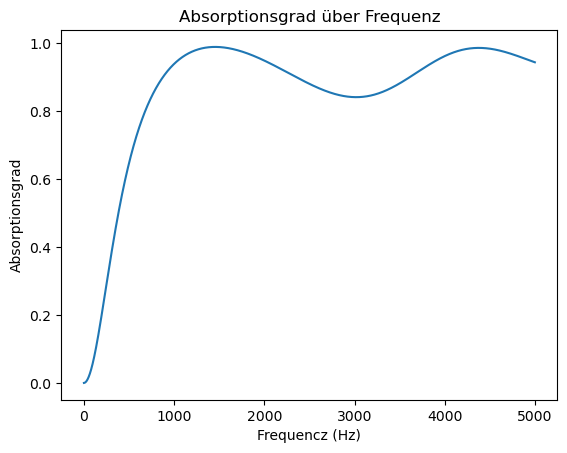

In [42]:
## Paremeter 
luft_c = 344
porous_dichte = 1100  # dichte von Poröser Schicht
luft_dichte = 1.213  # dichte von Luft-Schicht

# Parameters
dichte = 1.213
phi = 0.98
alpha_unend = 1.01
sigma = 20600
gamma = 1.4
P0 = 101325 # Pa
viskosität_L = 85*10**(-6)
thermisch_L = viskosität_L*2
Pr = 0.71
viskosität = 1.839*10**(-5)

# Impedanz
# Z0 = luft_dichte * luft_c
Z2 = luft_dichte * luft_c  # Luft-Schicht

# Frequenz Bereich
L1 = float(input('poroese Schicht Dicke(mm):'))
L1 = L1/1000
L2 = float(input('Luft Schicht Dicke(mm):'))
L2 = L2/1000
frequenz_min = 1
frequenz_max = float(input('max. frequenz:'))
frequenzbereich = np.arange(frequenz_min, frequenz_max)

alphas = np.array([]) # Array speichert Absorptionsgrad

for f in frequenzbereich:
    Z1, k1= JAC(f, dichte, phi, alpha_unend, sigma, gamma, P0, viskosität_L, thermisch_L, Pr, viskosität)
    k2 = 2 * np.pi * f / luft_c

    # T1, T2, T3 definieren
    T1 = np.array([[cos(k1*L1), 1j*Z1*sin(k1*L1)],
                   [(1j/Z1)*sin(k1*L1), cos(k1*L1)]])

    T2 = np.array([[np.cos(k2*L2), 1j*Z2*np.sin(k2*L2)],
                   [(1j/Z2)*np.sin(k2*L2), np.cos(k2*L2)]])

    # Rigid Backed
    T3 = np.array([[1, 0],  
                   [0, 1]])

    # T_total berechnen
    T_total = np.dot(T1, T2)

    # Absorptionsgrad berechnen
    R = (T_total[0, 0] - T_total[1, 0]*Z0) / (T_total[0, 0] + T_total[1, 0]*Z0) # Reflexionskoeffizient
    alpha = 1 - np.abs(R) ** 2
    alphas = np.append(alphas, alpha)

# Ersetzen der Werte durch 0
alphas[(alphas > -0.000001) & (alphas < 0)] = 0
alphas[(alphas < 0.000001) & (alphas > 0)] = 0

# Diagramm, Grad über Frequenz
plt.plot(frequenzbereich,alphas)
plt.xlabel('Frequencz (Hz)')
plt.ylabel('Absorptionsgrad')
plt.title('Absorptionsgrad über Frequenz')
plt.show()

poroese Schicht Dicke(mm):30
Luft Schicht Dicke(mm):30
Einfallswinkel(Grad):80
max. frequenz:5000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2136\2134157158.py:42: RuntimeWarning: invalid value encountered in sqrt
  k_2z = sqrt(k2**2 - k2*sin(theta)**2)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2136\2134157158.py:60: RuntimeWarning: invalid value encountered in cdouble_scalars
  R = (T_total[0, 0]*cos(theta) - T_total[1, 0]*Z0) / (T_total[0, 0]*cos(theta) + T_total[1, 0]*Z0) # Reflexionskoeffizient


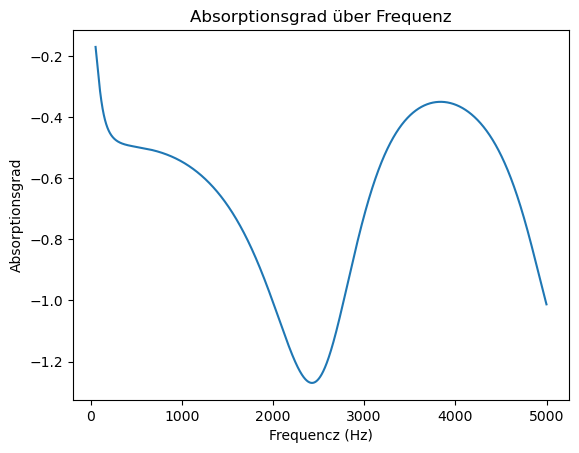

In [45]:
## Schräge Inzidenz (Oblique Incidence)
## Paremeter 
luft_c = 344
porous_dichte = 1100  # dichte von Poröser Schicht
luft_dichte = 1.213  # dichte von Luft-Schicht

# Parameters
dichte = 1.213
phi = 0.98
alpha_unend = 1.01
sigma = 20600
gamma = 1.4
P0 = 101325 # Pa
viskosität_L = 85*10**(-6)
thermisch_L = viskosität_L*2
Pr = 0.71
viskosität = 1.839*10**(-5)

# Impedanz
# Z0 = luft_dichte * luft_c
Z2 = luft_dichte * luft_c  # Luft-Schicht

# Frequenz Bereich
L1 = float(input('poroese Schicht Dicke(mm):'))
L1 = L1/1000
L2 = float(input('Luft Schicht Dicke(mm):'))
L2 = L2/1000
theta = float(input('Einfallswinkel(Grad):'))
frequenz_min = 1
frequenz_max = float(input('max. frequenz:'))
frequenzbereich = np.arange(frequenz_min, frequenz_max)

alphas = np.array([]) # Array speichert Absorptionsgrad


for f in frequenzbereich:
    Z1, k1= JAC(f, dichte, phi, alpha_unend, sigma, gamma, P0, viskosität_L, thermisch_L, Pr, viskosität)
    k2 = 2 * np.pi * f / luft_c

    ## neue k_pz bei Eingallswinkel theta
    k_1z = sqrt(k1**2 - k1*sin(theta)**2)
    k_2z = sqrt(k2**2 - k2*sin(theta)**2)
    
    
    # T1, T2, T3 definieren
    T1 = np.array([[cos(k_1z*L1), 1j*Z1*k1*sin(k_1z*L1)/k_1z],
                   [(1j/Z1)*k_1z*sin(k_1z*L1)/k1, cos(k_1z*L1)]])

    T2 = np.array([[cos(k_2z*L2), 1j*Z2*k2*sin(k_2z*L2)/k_2z],
                   [(1j/Z2)*k_2z*sin(k_2z*L2)/k2, cos(k_2z*L2)]])

    # Rigid Backed
    T3 = np.array([[1, 0],  
                   [0, 1]])

    # T_total berechnen
    T_total = np.dot(T1, T2)

    # Absorptionsgrad berechnen
    R = (T_total[0, 0]*cos(theta) - T_total[1, 0]*Z0) / (T_total[0, 0]*cos(theta) + T_total[1, 0]*Z0) # Reflexionskoeffizient
    alpha = 1 - np.abs(R) ** 2
    alphas = np.append(alphas, alpha)

# Ersetzen der Werte durch 0
alphas[(alphas > -0.000001) & (alphas < 0)] = 0
alphas[(alphas < 0.000001) & (alphas > 0)] = 0

# Diagramm, Grad über Frequenz
plt.plot(frequenzbereich,alphas)
plt.xlabel('Frequencz (Hz)')
plt.ylabel('Absorptionsgrad')
plt.title('Absorptionsgrad über Frequenz')
plt.show()